# KNN Library

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [24]:
# Read data
X = pd.read_csv('DATA\\X_data.csv')
y = pd.read_csv('DATA\\y_data.csv').values.ravel()

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (2111, 23), y shape: (2111,)


### Thực hiện trên tệp dữ liệu đã chuẩn hóa


In [25]:
# 4:1
X_train_4_1, X_test_4_1, y_train_4_1, y_test_4_1 = train_test_split(X, y, test_size=0.2, random_state=42)

# 7:3
X_train_7_3, X_test_7_3, y_train_7_3, y_test_7_3 = train_test_split(X, y, test_size=0.3, random_state=42)

# 6:4
X_train_6_4, X_test_6_4, y_train_6_4, y_test_6_4 = train_test_split(X, y, test_size=0.4, random_state=42)


In [29]:
# Standardize data for each split
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train_4_1_scaler = scaler.fit_transform(X_train_4_1)
X_test_4_1_scaler = scaler.transform(X_test_4_1)

X_train_7_3_scaler = scaler.fit_transform(X_train_7_3)
X_test_7_3_scaler = scaler.transform(X_test_7_3)

X_train_6_4_scaler = scaler.fit_transform(X_train_6_4)
X_test_6_4_scaler = scaler.transform(X_test_6_4)


[0.6220911341915678, 0.5884496879656707, 0.5552877774416547, 0.5325445643283699, 0.505546032066149, 0.4918097991103941, 0.4676425442282053, 0.4510627093767156, 0.43969278343585094, 0.43542513977121217, 0.42405185259879224, 0.41457878166560225, 0.40462505462001275, 0.3927800746193405, 0.38472992504453635, 0.37525013164823584, 0.366721566782069, 0.35961144163221404, 0.3558199724379013, 0.34823703404927564, 0.34160308336974665, 0.3359136387572407]
K optimal value: 2, Accuracy: 0.6220911341915678


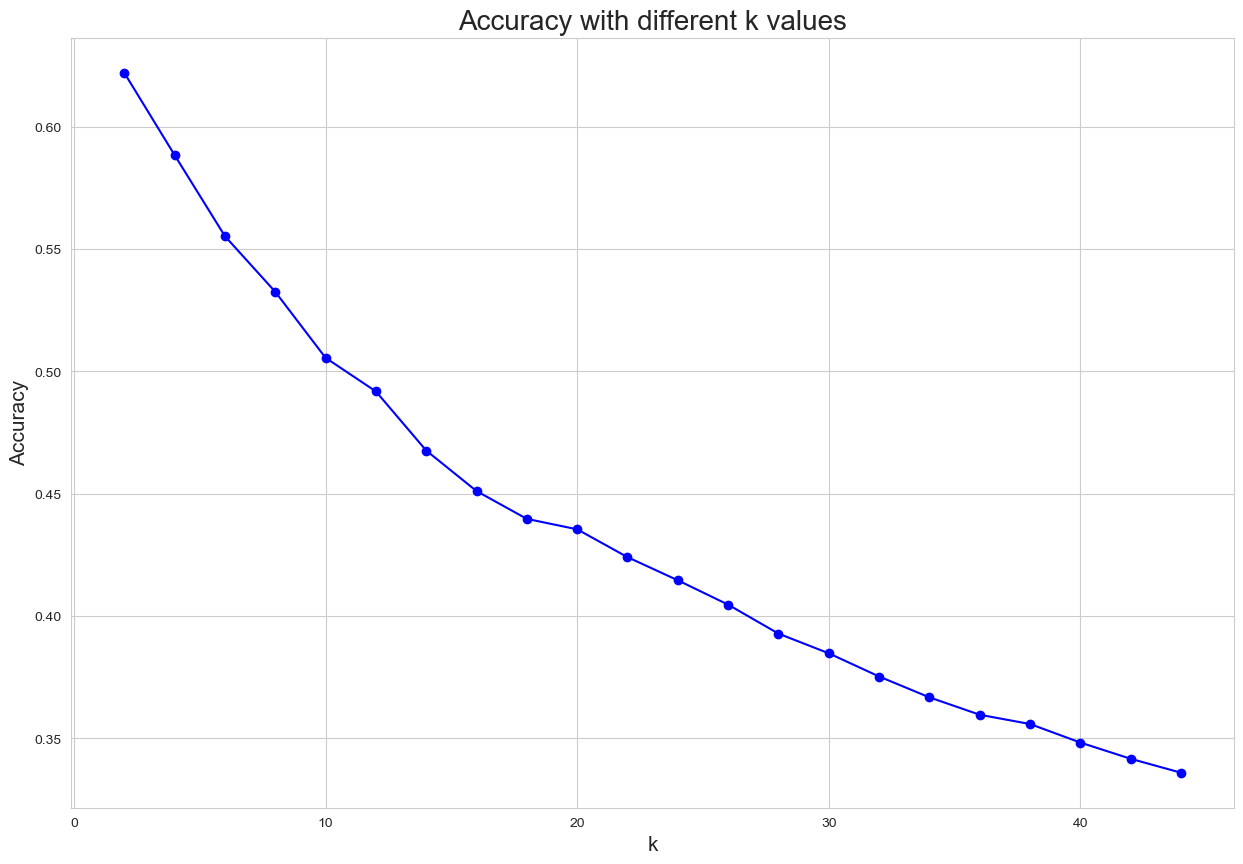

In [41]:
# Find k optimal value using k-fold cross validation
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 

k_values = range(2, int(math.sqrt(len(X_scaled))), 2) 
kf = KFold(n_splits=5)  
mean_accuracies = []

for k in k_values:
    accuracies = []
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        my_clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
        my_clf.fit(X_train, y_train)
        y_pred = my_clf.predict(X_test)

        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

    mean_accuracies.append(np.mean(accuracies))

best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print(mean_accuracies)

plt.figure(figsize=(15, 10))
plt.title('Accuracy with different k values', fontsize=20)
plt.xlabel('k', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b')
plt.savefig('K_opt_KNN.png')
print(f"K optimal value: {best_k}, Accuracy: {best_accuracy}")



Accuracy 4:1: 0.8108747044917257
Accuracy 7:3: 0.807570977917981
Accuracy 6:4: 0.8106508875739645
Classification report 4:1
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        56
           1       0.69      0.39      0.49        62
           2       0.84      0.86      0.85        78
           3       0.96      0.95      0.96        58
           4       0.98      1.00      0.99        63
           5       0.70      0.75      0.72        56
           6       0.71      0.82      0.76        50

    accuracy                           0.81       423
   macro avg       0.80      0.81      0.80       423
weighted avg       0.81      0.81      0.80       423

Classification report 7:3
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        86
           1       0.71      0.40      0.51        93
           2       0.81      0.83      0.82       102
           3       0.90      0.95   

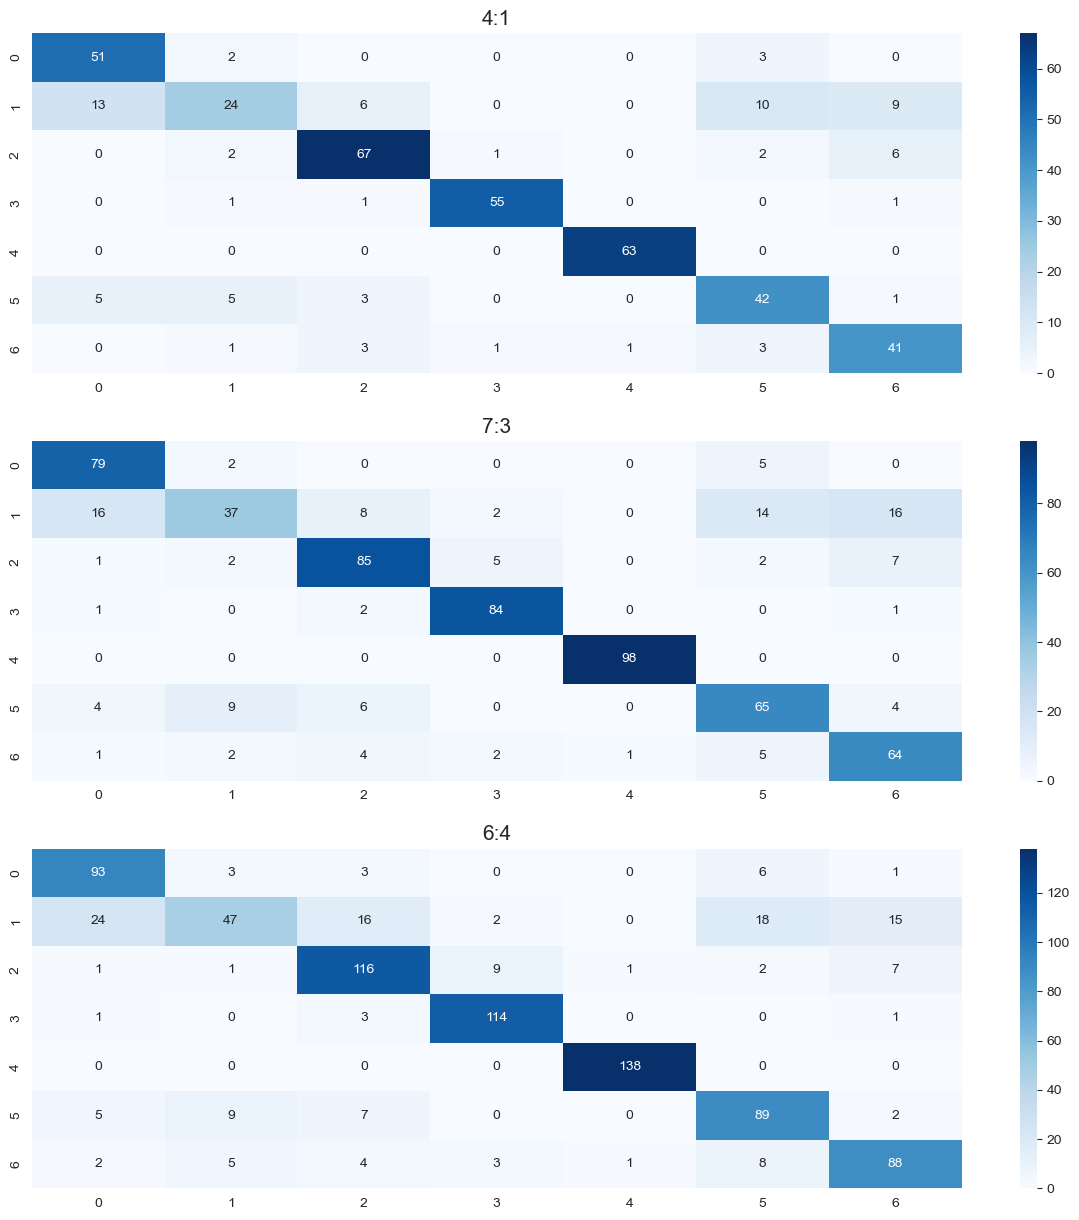

In [38]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

my_clf = KNeighborsClassifier(n_neighbors=best_k, weights='distance')

# 4:1
my_clf.fit(X_train_4_1_scaler, y_train_4_1)
y_pred_4_1 = my_clf.predict(X_test_4_1_scaler)

# 7:3
my_clf.fit(X_train_7_3_scaler, y_train_7_3)
y_pred_7_3 = my_clf.predict(X_test_7_3_scaler)

# 6:4
my_clf.fit(X_train_6_4_scaler, y_train_6_4)
y_pred_6_4 = my_clf.predict(X_test_6_4_scaler)

#acuracy
print(f"Accuracy 4:1: {accuracy_score(y_test_4_1, y_pred_4_1)}")
print(f"Accuracy 7:3: {accuracy_score(y_test_7_3, y_pred_7_3)}")
print(f"Accuracy 6:4: {accuracy_score(y_test_6_4, y_pred_6_4)}")

#classification report
print("Classification report 4:1")
print(classification_report(y_test_4_1, y_pred_4_1))
print("Classification report 7:3")
print(classification_report(y_test_7_3, y_pred_7_3))
print("Classification report 6:4")
print(classification_report(y_test_6_4, y_pred_6_4))

# Trực quan hóa confusion matrix của cả 3 trường hợp
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
sns.heatmap(confusion_matrix(y_test_4_1, y_pred_4_1), annot=True, fmt='d', cmap='Blues')
plt.title('4:1', fontsize=15)
plt.subplot(3, 1, 2)
sns.heatmap(confusion_matrix(y_test_7_3, y_pred_7_3), annot=True, fmt='d', cmap='Blues')
plt.title('7:3', fontsize=15)
plt.subplot(3, 1, 3)
sns.heatmap(confusion_matrix(y_test_6_4, y_pred_6_4), annot=True, fmt='d', cmap='Blues')
plt.title('6:4', fontsize=15)
plt.show()

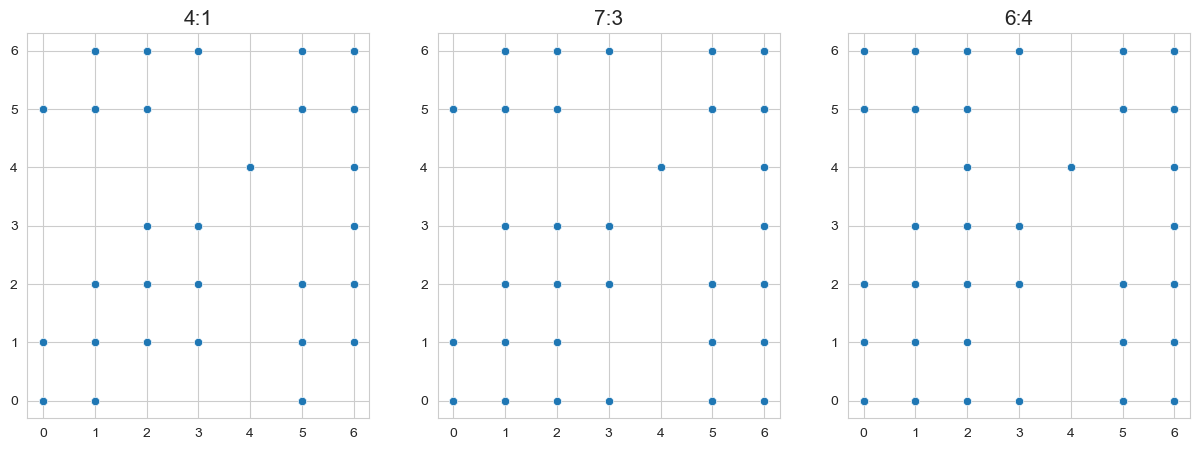

In [39]:
# trực quan hóa và đánh giá tương quan giữa nhãn dự đoán và nhãn thực tế
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test_4_1, y=y_pred_4_1)
plt.title('4:1', fontsize=15)
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test_7_3, y=y_pred_7_3)
plt.title('7:3', fontsize=15)
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test_6_4, y=y_pred_6_4)
plt.title('6:4', fontsize=15)
plt.show()


### Thực hiện trên tệp dữ liệu đã giảm chiều với PCA

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16)

X_train_4_1_pca = pca.fit_transform(X_train_4_1)
X_test_4_1_pca = pca.transform(X_test_4_1)

X_train_7_3_pca = pca.fit_transform(X_train_7_3)
X_test_7_3_pca = pca.transform(X_test_7_3)

X_train_6_4_pca = pca.fit_transform(X_train_6_4)
X_test_6_4_pca = pca.transform(X_test_6_4)


In [35]:
# Standardize data for each split
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train_4_1_pca_scaler = scaler.fit_transform(X_train_4_1_pca)
X_test_4_1_pca_scaler = scaler.transform(X_test_4_1_pca)

X_train_7_3_pca_scaler = scaler.fit_transform(X_train_7_3_pca)
X_test_7_3_pca_scaler = scaler.transform(X_test_7_3_pca)

X_train_6_4_pca_scaler = scaler.fit_transform(X_train_6_4_pca)
X_test_6_4_pca_scaler = scaler.transform(X_test_6_4_pca)


In [36]:
my_clf = KNeighborsClassifier(n_neighbors=best_k, weights='distance')

# 4:1
my_clf.fit(X_train_4_1_pca_scaler, y_train_4_1)
y_pred_4_1 = my_clf.predict(X_test_4_1_pca_scaler)

# 7:3
my_clf.fit(X_train_7_3_pca_scaler, y_train_7_3)
y_pred_7_3 = my_clf.predict(X_test_7_3_pca_scaler)

# 6:4
my_clf.fit(X_train_6_4_pca_scaler, y_train_6_4)
y_pred_6_4 = my_clf.predict(X_test_6_4_pca_scaler)


#acuracy
print(f"Accuracy 4:1: {accuracy_score(y_test_4_1, y_pred_4_1)}")
print(f"Accuracy 7:3: {accuracy_score(y_test_7_3, y_pred_7_3)}")
print(f"Accuracy 6:4: {accuracy_score(y_test_6_4, y_pred_6_4)}")

Accuracy 4:1: 0.8392434988179669
Accuracy 7:3: 0.831230283911672
Accuracy 6:4: 0.8331360946745562


In [37]:
#classification report
print("Classification report 4:1")
print(classification_report(y_test_4_1, y_pred_4_1))
print("Classification report 7:3")
print(classification_report(y_test_7_3, y_pred_7_3))
print("Classification report 6:4")
print(classification_report(y_test_6_4, y_pred_6_4))


Classification report 4:1
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        56
           1       0.73      0.56      0.64        62
           2       0.88      0.86      0.87        78
           3       1.00      0.97      0.98        58
           4       0.98      1.00      0.99        63
           5       0.68      0.68      0.68        56
           6       0.71      0.84      0.77        50

    accuracy                           0.84       423
   macro avg       0.83      0.84      0.83       423
weighted avg       0.84      0.84      0.84       423

Classification report 7:3
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        86
           1       0.68      0.54      0.60        93
           2       0.86      0.85      0.86       102
           3       0.98      0.98      0.98        88
           4       0.99      1.00      0.99        98
           5       0.74   

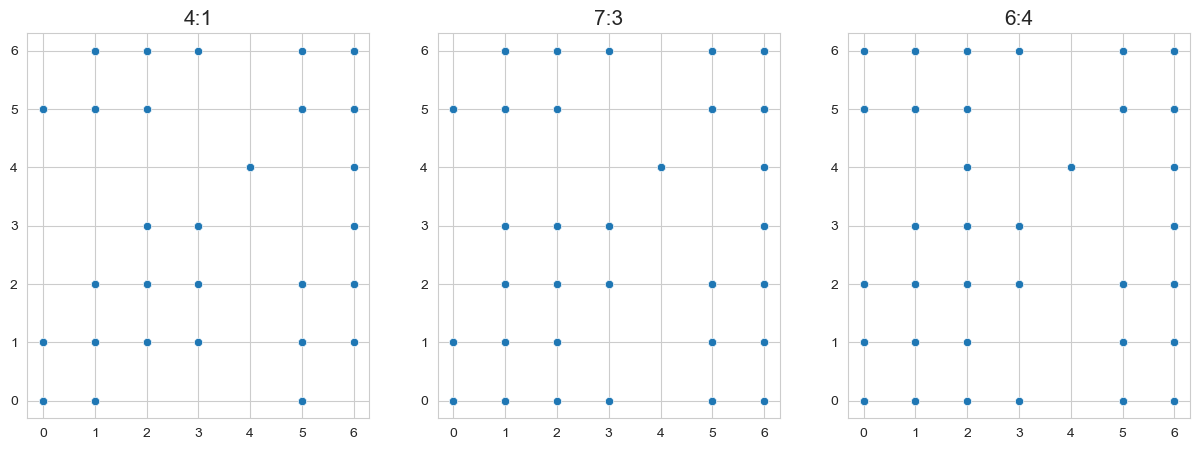

In [40]:
# Trực quan hóa và đánh giá tương quan giữa nhãn dự đoán và nhãn thực tế
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test_4_1, y=y_pred_4_1)
plt.title('4:1', fontsize=15)
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test_7_3, y=y_pred_7_3)
plt.title('7:3', fontsize=15)
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test_6_4, y=y_pred_6_4)
plt.title('6:4', fontsize=15)
    
plt.show()
